In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Leer el data frame en formato csv en la dirección https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv

2. Entender  el estado de los datos, para ello puedo emplear los comandos básicos del pandas

  ```python
  df.info()
  df.describe()
  df.isnull().sum()
  df.isna().sum()
```

In [189]:
url = "https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv"

df = pd.read_csv(url)

print(f"\nPrimeras 5 filas del dataset:")
print(df.head())

print("\nInformación básica del dataset:")
print(df.info())

print("\nEstadísticas descriptivas:")
print(df.describe())

print("\nCantidad de valores nulos por columna:")
print(df.isnull().sum())


Primeras 5 filas del dataset:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  

Información básica del dataset:
<class 'pan

3. Determinar los elementos únicos dentro de la columna ocean_proximity.

In [190]:
valores_unicos = df['ocean_proximity'].unique()
print("Valores únicos en la columna 'ocean_proximity':")
print(valores_unicos)

Valores únicos en la columna 'ocean_proximity':
['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


4. Para las columnas

```python
cols = ["housing_median_age",	"total_rooms",	"total_bedrooms",	"population",	"households",	"median_income",	"median_house_value"]
```

Determinar el promedio de cada una de las columnas asociado a cada elementos unico de ocean_proximity, intenta con la operación groupby.

In [191]:
cols = ["housing_median_age", "total_rooms", "total_bedrooms",
        "population", "households", "median_income", "median_house_value"]

promedios_por_categoria = df.groupby('ocean_proximity')[cols].mean()

print("Promedios de las columnas numéricas por categoría de ocean_proximity:")
print(promedios_por_categoria.round(2))

Promedios de las columnas numéricas por categoría de ocean_proximity:
                 housing_median_age  total_rooms  total_bedrooms  population  \
ocean_proximity                                                                
<1H OCEAN                     29.28      2628.34          546.54     1520.29   
INLAND                        24.27      2717.74          533.88     1391.05   
ISLAND                        42.40      1574.60          420.40      668.00   
NEAR BAY                      37.73      2493.59          514.18     1230.32   
NEAR OCEAN                    29.35      2583.70          538.62     1354.01   

                 households  median_income  median_house_value  
ocean_proximity                                                 
<1H OCEAN            517.74           4.23           240084.29  
INLAND               477.45           3.21           124805.39  
ISLAND               276.60           2.74           380440.00  
NEAR BAY             488.62           4.17  

5. Construye un histograma para cada columna, puede emplear la libreria de seaborn.

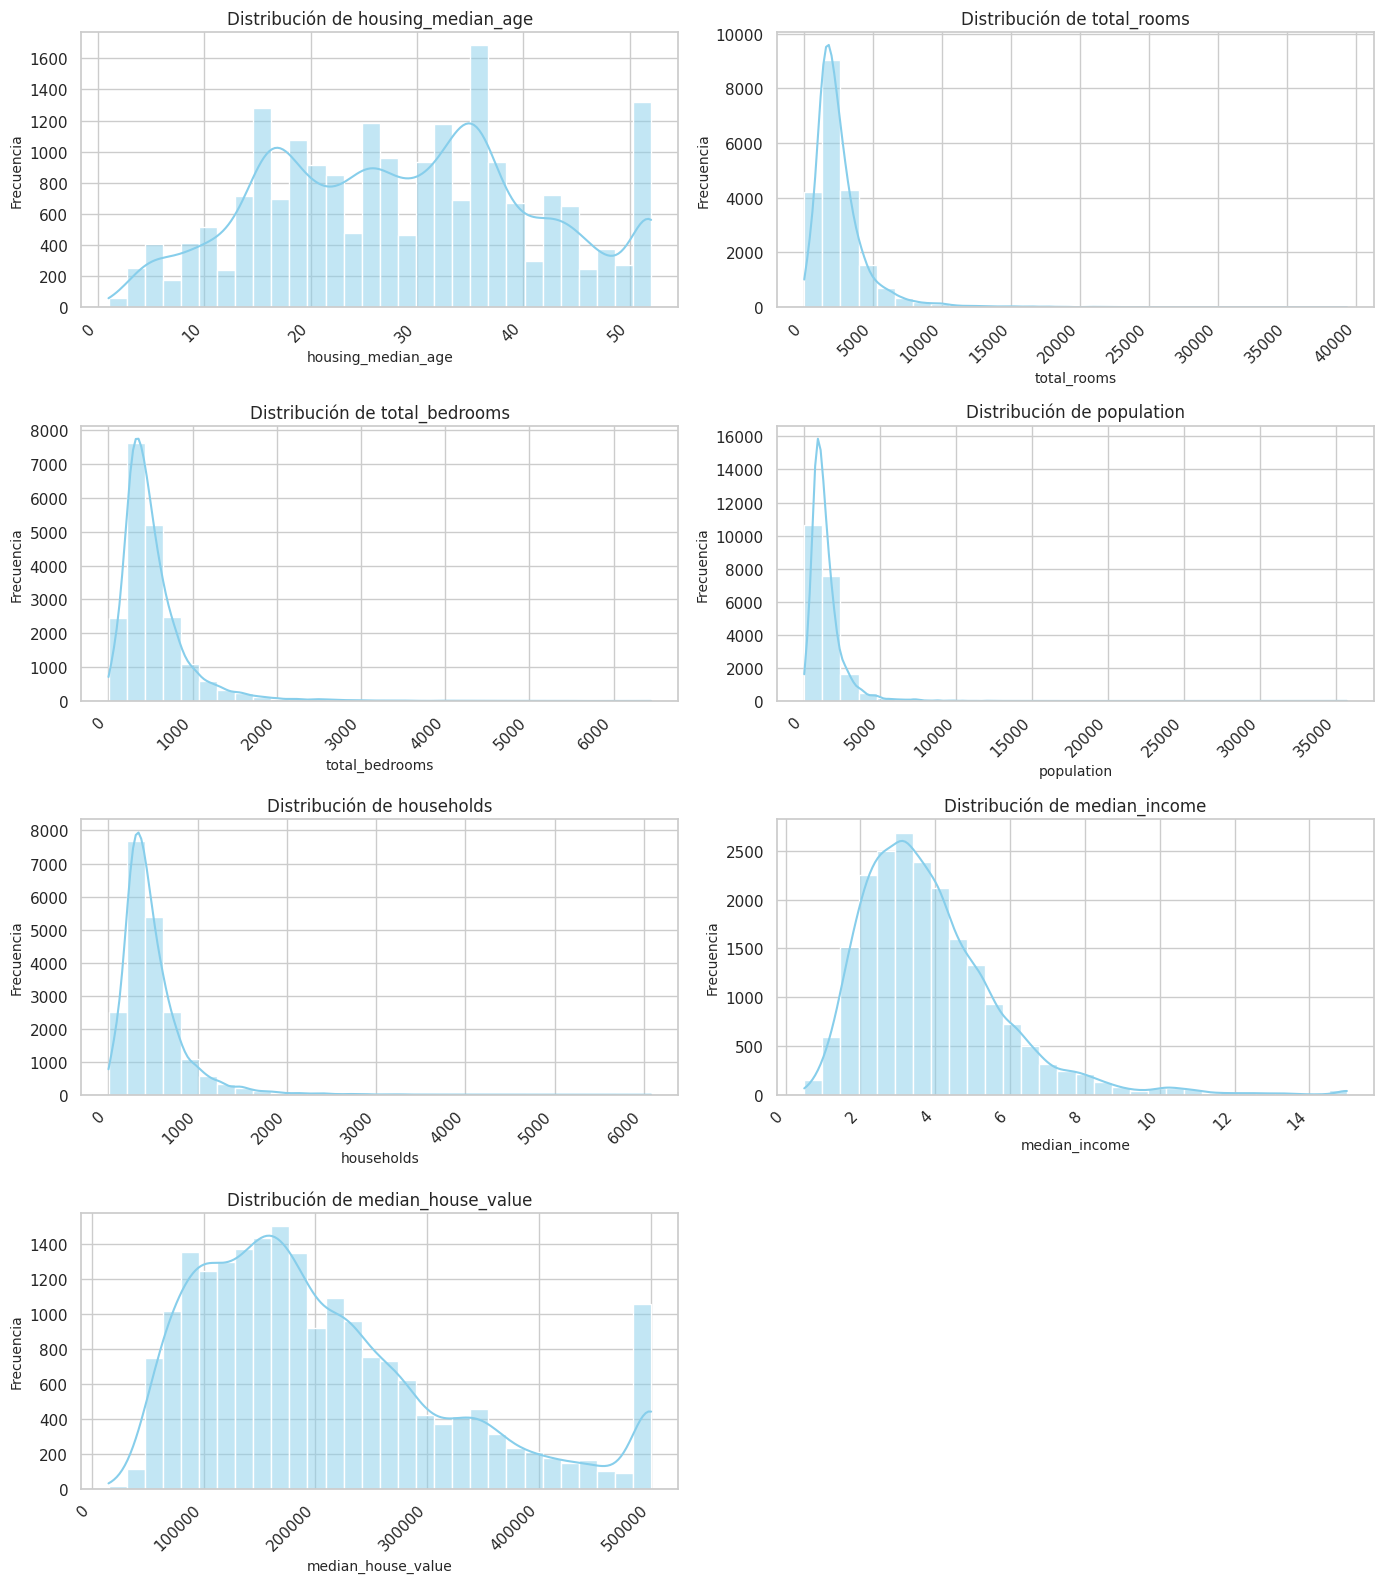

In [192]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 16))
fig.delaxes(axes[3, 1])

for i, col in enumerate(cols):
    ax = axes[i//2, i%2]
    sns.histplot(data=df, x=col, bins=30, kde=True, ax=ax, color='skyblue')
    ax.set_title(f'Distribución de {col}', fontsize=12)
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel('Frecuencia', fontsize=10)
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

7. Empleando el siguiente código realiza el gráfico boxplot,

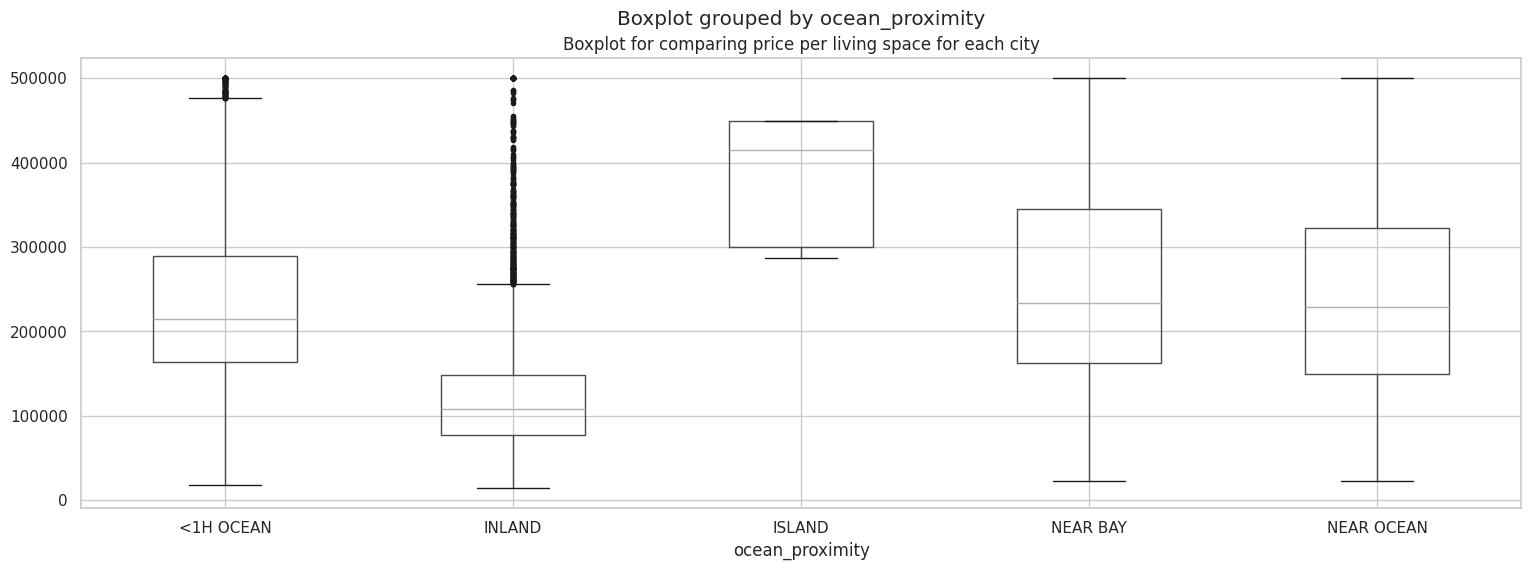

In [193]:
df.boxplot(column="median_house_value", by='ocean_proximity', sym = 'k.', figsize=(18,6))
plt.title('Boxplot for comparing price per living space for each city')
plt.show()

8. Determina la matrix de correlación.

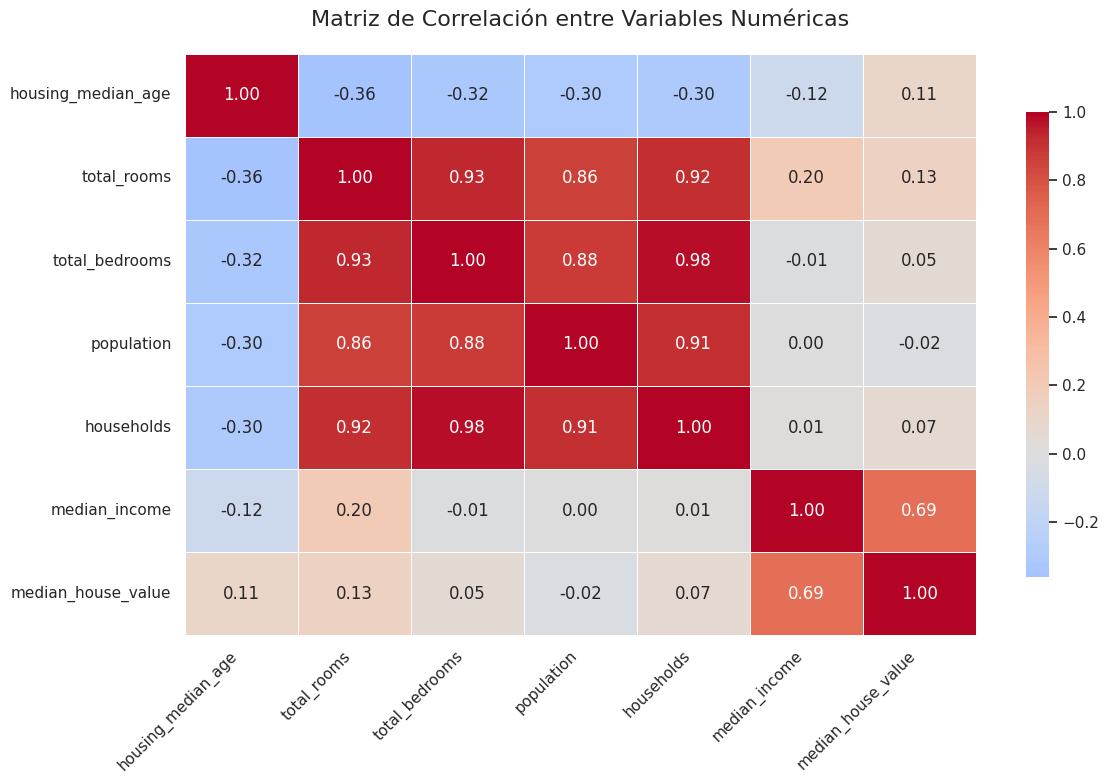

In [194]:
df_numeric = df[cols]
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            fmt=".2f", linewidths=.5, cbar_kws={'shrink': 0.8})

plt.title('Matriz de Correlación entre Variables Numéricas', pad=20, fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

9. con las columnas, realiza un grafico pairplot empleando seaborn  de python.
```python
cols = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
```

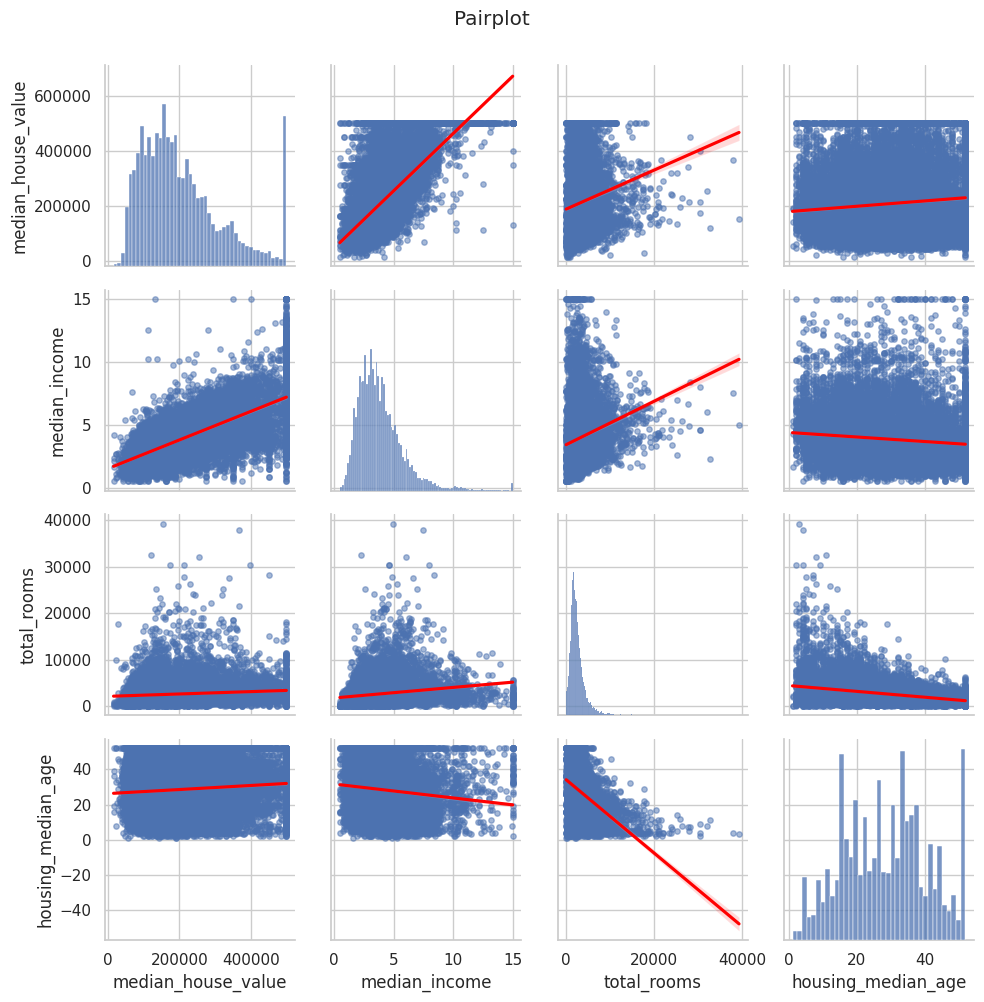

In [195]:
cols = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
df_subset = df[cols]
pairplot = sns.pairplot(df_subset, kind='reg', diag_kind='hist', plot_kws={'scatter_kws': {'alpha': 0.5, 's': 15}, 'line_kws': {'color': 'red'}},height=2.5)
pairplot.fig.suptitle('Pairplot', y=1)
plt.tight_layout()
plt.show()

10. Realizaun scatter plot con la libreria sea born de python, el color del grafico puede ser empleado con la columna median_house_value

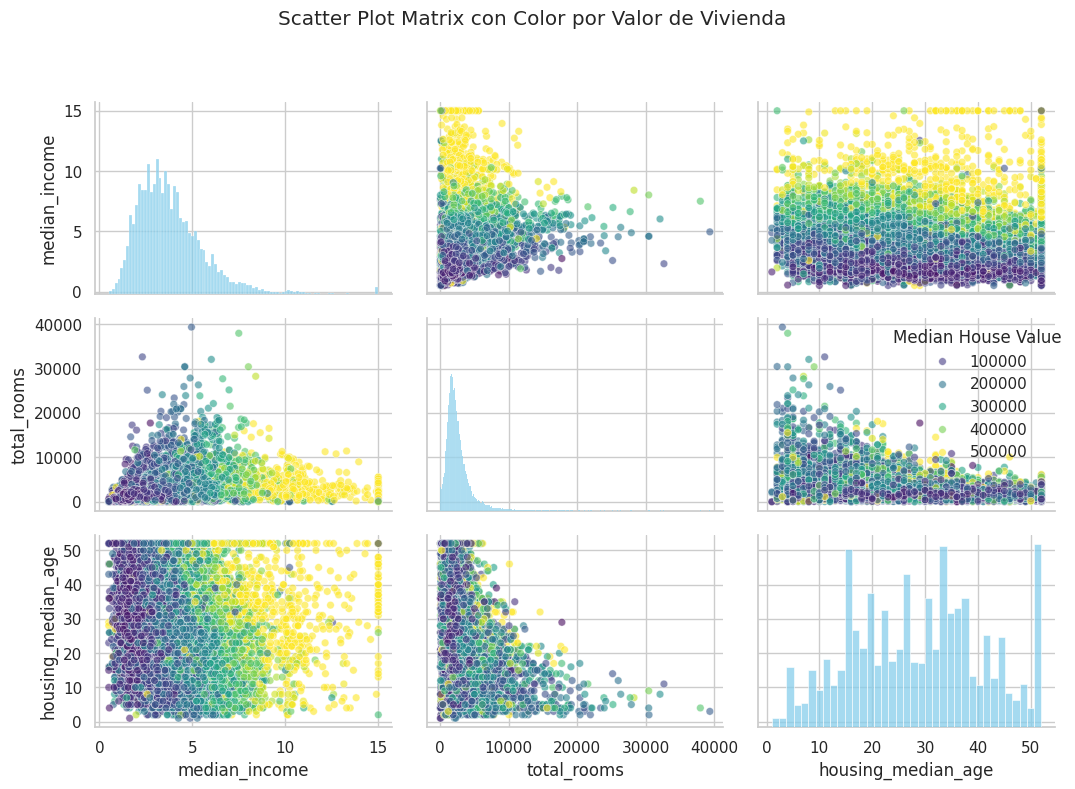

In [196]:
g = sns.PairGrid(df_subset, vars=["median_income", "total_rooms", "housing_median_age"],
                 height=2.5, aspect=1.2)

g = g.map_offdiag(sns.scatterplot, hue=df_subset["median_house_value"],
                  palette="viridis", alpha=0.6, s=30)

g = g.map_diag(sns.histplot, kde=False, color="skyblue")

g.add_legend(title="Median House Value", adjust_subtitles=True)

plt.suptitle("Scatter Plot Matrix con Color por Valor de Vivienda", y=1.05)
plt.tight_layout()
plt.show()

11. ¿Las siguiente linea es adecuada para separar el dataframe en datos de entrenamiento de test?, ¿que pasa en la división de los datos?


```python
from sklearn.model_selection import train_test_split

# ¿Es significativa la muestra que se esta considerando?
train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 42)

print(len(train_set))
print(len(test_set))

```

In [197]:
from sklearn.model_selection import train_test_split

# ¿Es significativa la muestra que se esta considerando?
train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 42)

print(len(train_set))
print(len(test_set))

16512
4128


Debido a que este dataset posee varias categorías y la distribución de estas no es uniforme, una muestra netamente aleatoria puede generar sesgos, como hacer alguna categoría quede subrepresentada y otra sobrerrepresentada. Si bien sería mejor una muestra mucho mayor, el tamaño de la muestra puede ser significativo para entrenar el modelo.

12. División del dataset en grupos:


La siguiente división puede ser realizada  basada en la experticie de lo que se esta analizando, y sobre ello se debe tomar una muestra significativa. Una posible solución al problema puede ser el siguiente:

```python
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])


df.income_cat.hist()


```

La forma automatica de realizar la división puede ser la siguiente:

```python
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["income_cat"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

```


Analiza las siguiente lineas de código y saca conclusiones referente a las proporciones del dataset.

```python
df["income_cat"].value_counts() / len(df)

strat_train_set["income_cat"].value_counts() / len(strat_train_set)

strat_test_set["income_cat"].value_counts() / len(strat_test_set)


train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 7)

train_set["income_cat"].value_counts() / len(train_set)
```

un comparativo general puede ser estructurado de la siguente forma, analiza  los errores:

```python
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] =abs( 100 * compare_props["Random"] / compare_props["Overall"] - 100)
compare_props["Strat. %error"] =abs( 100 * compare_props["Stratified"] / compare_props["Overall"] - 100)
```

<Axes: >

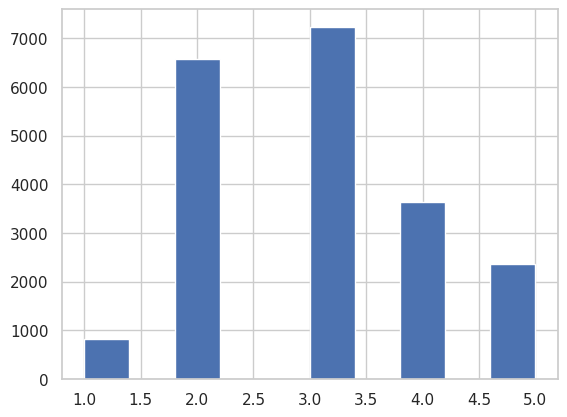

In [198]:
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])


df.income_cat.hist()

In [199]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["income_cat"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

Esta división estratificada intenta mantener la misma proporción en el ingreso medio creando categorías para este.

In [200]:
print(f"Proporción en el conjunto de datos original:\n{df['income_cat'].value_counts() / len(df)}")
print(f"Proporción en el conjunto de entrenamiento estratificado:\n{strat_train_set['income_cat'].value_counts() / len(strat_train_set)}")
print(f"Proporción en el conjunto de prueba estratificado:\n{strat_test_set['income_cat'].value_counts() / len(strat_test_set)}")

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 7)

print(f"Proporción en el conjunto de entrenamiento aleatorio:\n{train_set['income_cat'].value_counts() / len(train_set)}")

Proporción en el conjunto de datos original:
income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64
Proporción en el conjunto de entrenamiento estratificado:
income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64
Proporción en el conjunto de prueba estratificado:
income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64
Proporción en el conjunto de entrenamiento aleatorio:
income_cat
3    0.348716
2    0.324188
4    0.173147
5    0.114159
1    0.039789
Name: count, dtype: float64


In [201]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] =abs( 100 * compare_props["Random"] / compare_props["Overall"] - 100)
compare_props["Strat. %error"] =abs( 100 * compare_props["Stratified"] / compare_props["Overall"] - 100)

In [202]:
print(compare_props)

             Overall  Stratified    Random  Rand. %error  Strat. %error
income_cat                                                             
1           0.039826    0.039971  0.040213      0.973236       0.364964
2           0.318847    0.318798  0.324370      1.732260       0.015195
3           0.350581    0.350533  0.358527      2.266446       0.013820
4           0.176308    0.176357  0.167393      5.056334       0.027480
5           0.114438    0.114341  0.109496      4.318374       0.084674


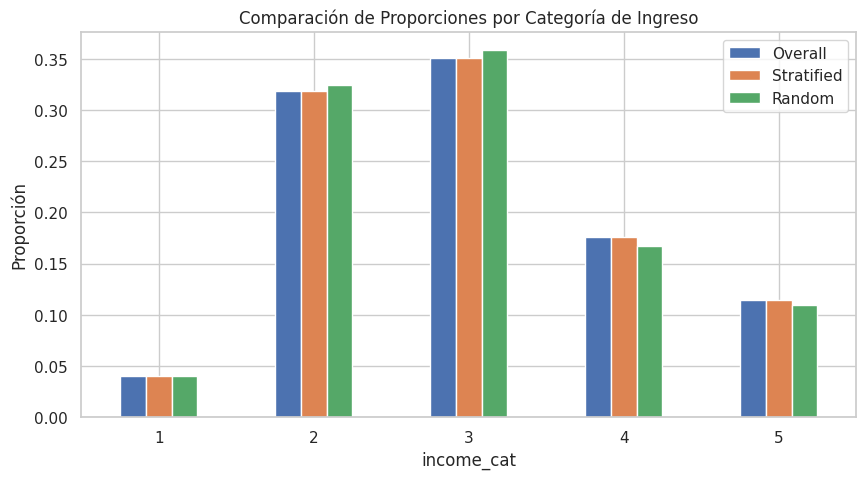

In [203]:
compare_props[["Overall", "Stratified", "Random"]].plot.bar(figsize=(10,5))
plt.title("Comparación de Proporciones por Categoría de Ingreso")
plt.ylabel("Proporción")
plt.xticks(rotation=0)
plt.show()

A simple vista se ve como la división estratificada mantiene mejor las proporciones con respecto a las categorías creadas para el ingreso medio. Esto es más evidente al ver los errores, los cuales pueden ser de hasta 5% para la división aleatoria mientras que para la división estratificada no supera el 0.3%. Esto quiere decir que la división estratificada es una buena herramienta para evitar sesgos sobretodo en datasets pequeños.

13. Puedes agregar nuevas variables al dataframe para el análisis, por ejemplo:
```python
df_train["rooms_per_household"] = df_train["total_rooms"]/df_train["households"]
df_train["bedrooms_per_room"] = df_train["total_bedrooms"]/df_train["total_rooms"]
df_train["population_per_household"]=df_train["population"]/df_train["households"]
```

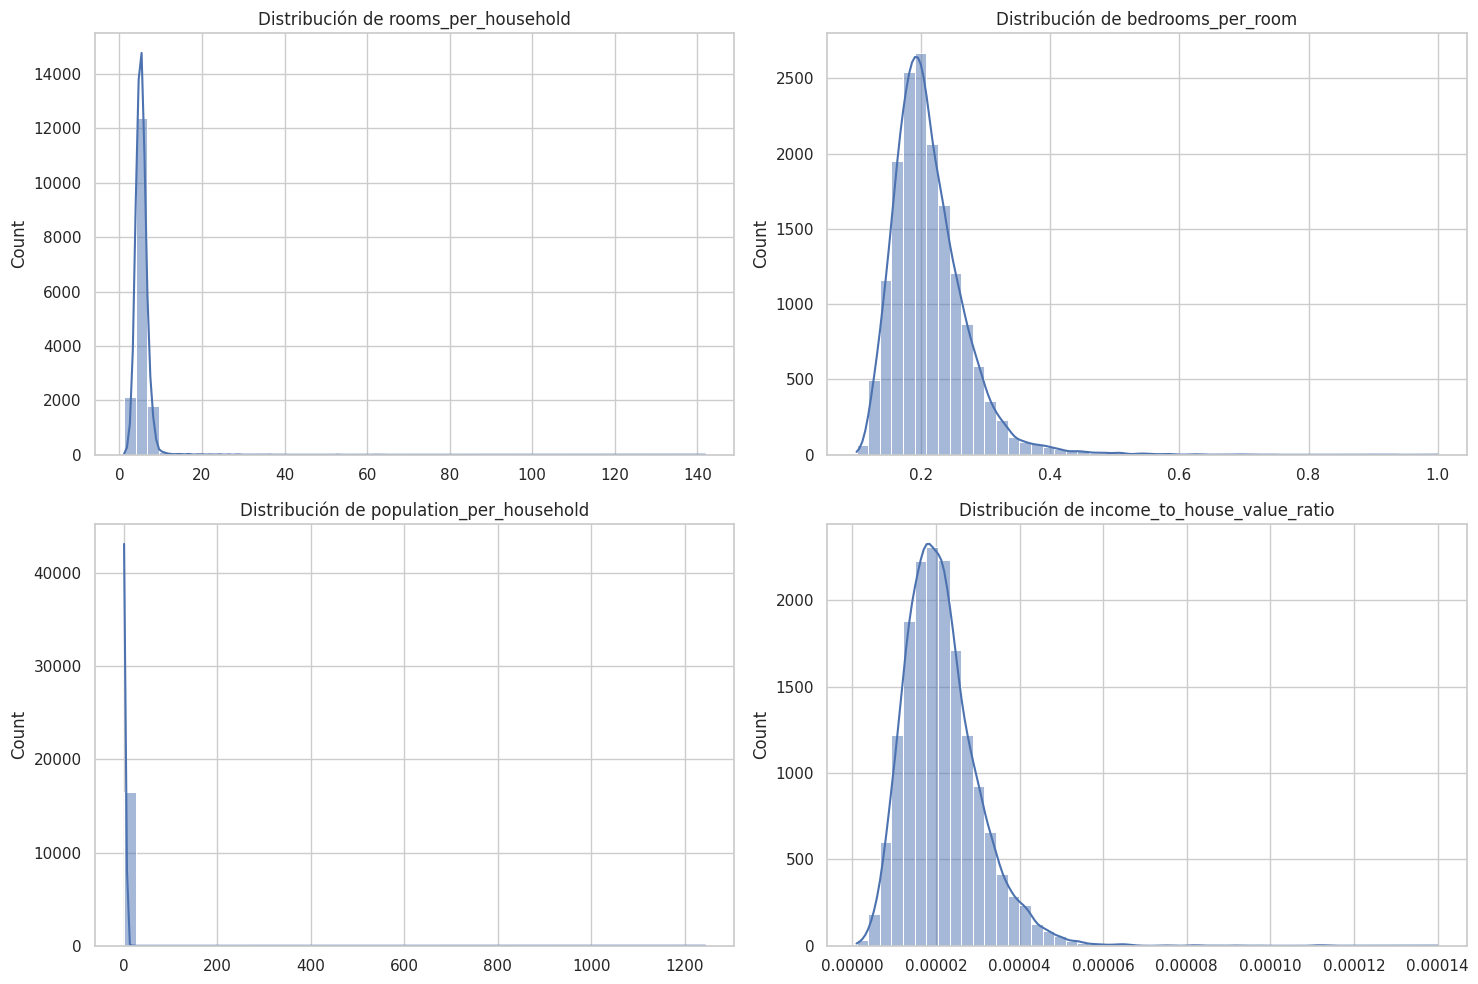

In [204]:
def create_new_features(df):
    df["rooms_per_household"] = df["total_rooms"] / df["households"]
    df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
    df["population_per_household"] = df["population"] / df["households"]
    df["bedrooms_per_household"] = df["total_bedrooms"] / df["households"]
    df["persons_per_room"] = df["population"] / df["total_rooms"]
    df["income_to_house_value_ratio"] = df["median_income"] / df["median_house_value"]
    df["log_total_rooms"] = np.log1p(df["total_rooms"])
    df["log_population"] = np.log1p(df["population"])
    df["log_households"] = np.log1p(df["households"])

    return df

# Aplicar a los conjuntos de entrenamiento y prueba
strat_train_set = create_new_features(strat_train_set)
strat_test_set = create_new_features(strat_test_set)


new_features = ["rooms_per_household", "bedrooms_per_room",
               "population_per_household", "income_to_house_value_ratio"]

# Configurar la figura
plt.figure(figsize=(15, 10))

# Crear histogramas para cada nueva variable
for i, feature in enumerate(new_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(strat_train_set[feature], bins=50, kde=True)
    plt.title(f'Distribución de {feature}')
    plt.xlabel('')
    plt.grid(True)

plt.tight_layout()
plt.show()

# Limpieza de datos

Lo que sigue son códigos que pueden servir para limpiar los datos.

```python

df.isnull().sum()


#df_train.dropna(subset=["total_bedrooms"]) #Eliminar los nan
#df_train.drop("total_bedrooms", axis=1)  # Eliminar la columna
median = df_train["total_bedrooms"].median()
q=df_train["total_bedrooms"].fillna(median).copy()


q=pd.DataFrame(q)

q.isnull().sum()

```

##imputer

Forma automática para tratar los datos (Asegurate de trabajar con las columnas numéricas):


```python
from sklearn.impute import SimpleImputer
#imputer = Imputer(strategy="median")

df_train_num = df_train.drop("ocean_proximity", axis=1)

imp_mean = SimpleImputer( strategy='mean')

imp_mean.fit(df_train_num)

imp_mean.statistics_
```

14. Compara las siguientes variables:
```python
imp_mean.statistics_
df_train_num.median()
```


```python
Constuye la matriz de características:

X = imp_mean.transform(df)
housing_tr = pd.DataFrame(X, columns=df_train_num.columns)
```


In [205]:
from sklearn.impute import SimpleImputer
# imputer = Imputer(strategy="median")

df_train_num = df.drop("ocean_proximity", axis=1)
df_train_num = df.select_dtypes(include=['int64', 'float64'])

imp_mean = SimpleImputer( strategy='mean')

imp_mean.fit(df_train_num)

imp_mean.statistics_

array([-1.19569704e+02,  3.56318614e+01,  2.86394864e+01,  2.63576308e+03,
        5.37870553e+02,  1.42547674e+03,  4.99539680e+02,  3.87067100e+00,
        2.06855817e+05])

In [206]:
imp_mean.statistics_

array([-1.19569704e+02,  3.56318614e+01,  2.86394864e+01,  2.63576308e+03,
        5.37870553e+02,  1.42547674e+03,  4.99539680e+02,  3.87067100e+00,
        2.06855817e+05])

In [207]:
df_train_num.median()

,0
longitude,-118.4900
latitude,34.2600
housing_median_age,29.0000
total_rooms,2127.0000
total_bedrooms,435.0000
population,1166.0000
households,409.0000
median_income,3.5348
median_house_value,179700.0000


Estas dos estadísticas son la media y la mediana de cada columna. La mediana tiene la ventaja de que es menos sensible a valores extremos que la media, sin embargo si la distribución de datos no es simetríca la mediana nos puede dar información errada sobre la ubicación de los datos.

In [208]:
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

df_train_num = strat_train_set.select_dtypes(include=['int64', 'float64'])
imp_mean = SimpleImputer(strategy='mean')
imp_mean.fit(df_train_num)
X_imputed = imp_mean.transform(df_train_num)
housing_tr = pd.DataFrame(X_imputed, columns=df_train_num.columns)


print("Dimensión de la matriz de características:", X_imputed.shape)
print("\nPrimeras filas después de imputación:")
print(housing_tr.head())

Dimensión de la matriz de características: (16512, 18)

Primeras filas después de imputación:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -121.46     38.52                29.0       3873.0           797.0   
1    -117.23     33.09                 7.0       5320.0           855.0   
2    -119.04     35.37                44.0       1618.0           310.0   
3    -117.13     32.75                24.0       1877.0           519.0   
4    -118.70     34.28                27.0       3536.0           646.0   

   population  households  median_income  median_house_value  \
0      2237.0       706.0         2.1736             72100.0   
1      2015.0       768.0         6.3373            279600.0   
2       667.0       300.0         2.8750             82700.0   
3       898.0       483.0         2.2264            112500.0   
4      1837.0       580.0         4.4964            238300.0   

   rooms_per_household  bedrooms_per_room  population_per_household  \

15. ¿Qué realizan las siguientes líneas de código?

In [209]:
from sklearn.preprocessing import OneHotEncoder
df["ocean_proximity"].unique()
housing_cat=df[["ocean_proximity"]]
housing_cat

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
...,...
20635,INLAND
20636,INLAND
20637,INLAND
20638,INLAND


Las líneas anteriores tomas los valores distintos de la columna "ocean_proximity" y luego define un dataframe con esta columna.  

In [210]:
cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(housing_cat_1hot)
print(cat_encoder.categories_)

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


Esta parte del código lo que hace es generar una matriz binaria donde cada columna representa una de las categorías diferentes de la columna "ocean_proximity" según el orden que se muestra en "cat_encoder.categories". Así, vemos que las primeras filas son de "NEAR_BAY" que representa la columna 4 y las últimas de "INLAND" que representa la columna 2. Este proceso sirve para convertir datos categóricos en datos númericos con los cuales un algoritmo de ML puede trabajar.

In [211]:
df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns = cat_encoder.categories_[0])
df_cat_1hot

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
20635,0.0,1.0,0.0,0.0,0.0
20636,0.0,1.0,0.0,0.0,0.0
20637,0.0,1.0,0.0,0.0,0.0
20638,0.0,1.0,0.0,0.0,0.0


La línea anterior crear un dataframe con la matriz binaria que creamos anteriormente.

In [212]:
housing_tr_ = housing_tr.join(df_cat_1hot)
housing_tr_

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,...,persons_per_room,income_to_house_value_ratio,log_total_rooms,log_population,log_households,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,5.485836,...,0.577588,0.000030,8.262043,7.713338,6.561031,0.0,0.0,0.0,1.0,0.0
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,6.927083,...,0.378759,0.000023,8.579417,7.608871,6.645091,0.0,0.0,0.0,1.0,0.0
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,5.393333,...,0.412237,0.000035,7.389564,6.504288,5.707110,0.0,0.0,0.0,1.0,0.0
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,3.886128,...,0.478423,0.000020,7.537963,6.801283,6.182085,0.0,0.0,0.0,1.0,0.0
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,6.096552,...,0.519514,0.000019,8.171034,7.516433,6.364751,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,6.658342,...,0.303976,0.000019,8.804775,7.614312,6.909753,0.0,1.0,0.0,0.0,0.0
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,5.571932,...,0.603594,0.000031,8.974871,8.470102,7.257708,0.0,1.0,0.0,0.0,0.0
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,4.110465,...,0.647808,0.000023,6.562444,6.129050,5.153292,0.0,1.0,0.0,0.0,0.0
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,6.297405,...,0.382884,0.000016,8.057061,7.097549,6.218600,0.0,1.0,0.0,0.0,0.0


La línea anterior une el dataframe original con el dataframe binario.

16. Las variables pueden ser escaladas como sigue:

```python

cols=["longitude", "latitude",	"housing_median_age",	"total_rooms",\
      "total_bedrooms",	"population",	"households",	"median_income",\
      "<1H OCEAN",	"INLAND",	"ISLAND",	"NEAR BAY", "NEAR OCEAN"]


housing_scale=housing_tr_[cols]
housing_scale


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(housing_scale)

X = scaler.transform(housing_scale)


housing_prepared = pd.DataFrame(X, columns = housing_scale.columns)

```

In [213]:
cols=["longitude", "latitude",    "housing_median_age",    "total_rooms",\
      "total_bedrooms",    "population",    "households",    "median_income",\
      "<1H OCEAN",    "INLAND",    "ISLAND",    "NEAR BAY", "NEAR OCEAN"]


housing_scale=housing_tr_[cols]
housing_scale

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,0.0,0.0,0.0,1.0,0.0
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,0.0,0.0,0.0,1.0,0.0
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,0.0,0.0,0.0,1.0,0.0
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,0.0,0.0,0.0,1.0,0.0
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,0.0,1.0,0.0,0.0,0.0
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,0.0,1.0,0.0,0.0,0.0
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,0.0,1.0,0.0,0.0,0.0
16510,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,0.0,1.0,0.0,0.0,0.0


In [214]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(housing_scale)

X = scaler.transform(housing_scale)


housing_prepared = pd.DataFrame(X, columns = housing_scale.columns)
housing_prepared

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.287849,0.635494,0.549020,0.098362,0.128061,0.062614,0.131441,0.115426,0.0,0.0,0.0,1.0,0.0
1,0.709163,0.058448,0.117647,0.135168,0.137403,0.056392,0.143017,0.402574,0.0,0.0,0.0,1.0,0.0
2,0.528884,0.300744,0.843137,0.041003,0.049613,0.018610,0.055639,0.163798,0.0,0.0,0.0,1.0,0.0
3,0.719124,0.022317,0.450980,0.047591,0.083280,0.025085,0.089806,0.119067,0.0,0.0,0.0,1.0,0.0
4,0.562749,0.184910,0.509804,0.089790,0.103737,0.051403,0.107916,0.275617,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.725100,0.052072,0.254902,0.169380,0.197970,0.056700,0.186520,0.316554,0.0,1.0,0.0,0.0,0.0
16508,0.291833,0.634431,0.274510,0.200819,0.228737,0.133580,0.264376,0.159584,0.0,1.0,0.0,0.0,0.0
16509,0.162351,0.626993,0.921569,0.017831,0.026418,0.012753,0.031740,0.184811,0.0,1.0,0.0,0.0,0.0
16510,0.164343,0.613177,0.254902,0.080099,0.093106,0.033773,0.093167,0.254928,0.0,1.0,0.0,0.0,0.0


17. Para todos los pasos anteriores, contruye ordenadamente los pasos limpieza, escalamiento de variables, manejo de texto y atributos categóricos para tener el data frame listo para el análisis. Recuerda dividir el data frame en datos de entrenamiento y de test con la correcta estractificación. Genera dos data frame: housing_train, housing_test, cada una, debe tener las caracteristicas y los datos etiquetados.




In [215]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler


url = "https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv"
df = pd.read_csv(url)


# Creación de categorías mediante la columna "median_income":
df["income_cat"] = pd.cut(df["median_income"],bins=[0., 1.5, 3.0, 4.5, 6., np.inf],labels=[1, 2, 3, 4, 5])


# División estratificada:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["income_cat"]):
    housing_train = df.loc[train_index]
    housing_test = df.loc[test_index]

# Quitamos la columna categórica "ocean_proximity":
housing_train_num = housing_train.drop("ocean_proximity", axis=1)
housing_test_num = housing_test.drop("ocean_proximity", axis=1)

# Encoder:
cat_encoder = OneHotEncoder(sparse_output=False)
housing_train_cat = housing_train[["ocean_proximity"]]
housing_test_cat = housing_test[["ocean_proximity"]]

housing_train_cat_1hot = cat_encoder.fit_transform(housing_train_cat)
housing_test_cat_1hot = cat_encoder.fit_transform(housing_test_cat)

cat_cols = list(cat_encoder.categories_[0])

housing_train_cat = pd.DataFrame(housing_train_cat_1hot, columns=cat_cols, index=housing_train.index)
housing_test_cat = pd.DataFrame(housing_test_cat_1hot, columns=cat_cols, index=housing_test.index)

housing_train = housing_train_num.join(housing_train_cat)
housing_test = housing_test_num.join(housing_test_cat)

# Escalamiento:
scaler = MinMaxScaler()
housing_train_scaled = scaler.fit_transform(housing_train)
housing_test_scaled = scaler.fit_transform(housing_test)

housing_train = pd.DataFrame(housing_train_scaled, columns=housing_train.columns)
housing_test = pd.DataFrame(housing_test_scaled, columns=housing_test.columns)

# Imputación de los datos para quitar datos faltantes usando la media:
imputer = SimpleImputer(strategy="mean")

imputer.fit(housing_train)
X_train_imputed = imputer.transform(housing_train)
X_test_imputed = imputer.transform(housing_test)

housing_train = pd.DataFrame(X_train_imputed)
housing_test = pd.DataFrame(X_test_imputed)

housing_train


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.287849,0.635494,0.549020,0.098362,0.128061,0.062614,0.131441,0.115426,0.117734,0.25,0.0,1.0,0.0,0.0,0.0
1,0.709163,0.058448,0.117647,0.135168,0.137403,0.056392,0.143017,0.402574,0.545567,1.00,0.0,0.0,0.0,0.0,1.0
2,0.528884,0.300744,0.843137,0.041003,0.049613,0.018610,0.055639,0.163798,0.139589,0.25,0.0,1.0,0.0,0.0,0.0
3,0.719124,0.022317,0.450980,0.047591,0.083280,0.025085,0.089806,0.119067,0.201032,0.25,0.0,0.0,0.0,0.0,1.0
4,0.562749,0.184910,0.509804,0.089790,0.103737,0.051403,0.107916,0.275617,0.460413,0.50,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.725100,0.052072,0.254902,0.169380,0.197970,0.056700,0.186520,0.316554,0.522680,0.75,1.0,0.0,0.0,0.0,0.0
16508,0.291833,0.634431,0.274510,0.200819,0.228737,0.133580,0.264376,0.159584,0.155465,0.25,0.0,1.0,0.0,0.0,0.0
16509,0.162351,0.626993,0.921569,0.017831,0.026418,0.012753,0.031740,0.184811,0.258558,0.50,1.0,0.0,0.0,0.0,0.0
16510,0.164343,0.613177,0.254902,0.080099,0.093106,0.033773,0.093167,0.254928,0.501237,0.50,1.0,0.0,0.0,0.0,0.0


In [216]:
print("=== Conjunto de Entrenamiento ===")
print(f"Filas: {len(housing_train)}, Columnas: {len(housing_train.columns)}")
print("\n=== Conjunto de Prueba ===")
print(f"Filas: {len(housing_test)}, Columnas: {len(housing_test.columns)}")

=== Conjunto de Entrenamiento ===
Filas: 16512, Columnas: 15

=== Conjunto de Prueba ===
Filas: 4128, Columnas: 15


In [217]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train = housing_train.drop(9, axis=1)
y_train = housing_train[9].copy()
X_test = housing_test.drop(9, axis=1)
y_test = housing_test[9].copy()

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

def print_metrics(y_true, y_pred, set_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\nMétricas en {set_name}:")
    print(f"- MSE: {mse:,.2f}")
    print(f"- RMSE: {rmse:,.2f}")
    print(f"- R²: {r2:.4f}")

print_metrics(y_train, y_train_pred, "ENTRENAMIENTO")
print_metrics(y_test, y_test_pred, "PRUEBA")

sample_idx = 100
sample_data = X_test.iloc[[sample_idx]]
real_value = y_test.iloc[sample_idx]
predicted_value = y_test_pred[sample_idx]

print(f"\nEjemplo concreto (índice {sample_idx}):")
print(sample_data)
print(f"\nValor real: {real_value:.2f}")
print(f"Valor predicho: {predicted_value:.2f}")
print(f"Diferencia: {abs(real_value - predicted_value):.2f} ({abs((real_value - predicted_value)/real_value*100):.1f}% de error)")


Métricas en ENTRENAMIENTO:
- MSE: 0.01
- RMSE: 0.11
- R²: 0.8252

Métricas en PRUEBA:
- MSE: 0.01
- RMSE: 0.11
- R²: 0.8248

Ejemplo concreto (índice 100):
           0         1         2         3         4         5         6   \
100  0.516632  0.173404  0.235294  0.187004  0.204531  0.104373  0.199145   

           7         8    10   11   12   13   14  
100  0.239438  0.412784  0.0  0.0  0.0  0.0  1.0  

Valor real: 0.50
Valor predicho: 0.56
Diferencia: 0.06 (12.2% de error)


1. ¿Que puede concluir respecto al modelo empleado?
  

El preprocesamiento de los datos es de vital importancia a la hora de hallar un modelo predictivo, debido a que así se puede evitar sesgos, corregir datos erroneos o faltantes y escalar los datos lo que puede ayudar a que el modelo no suponga que ciertos valores son más importantes que otros. Con esto se puede generar modelos mucho más precisos y lograr también entrenamientos más eficientes.

Al entrenar el modelo con una regresión lineal obtuvimos un score de 0.82 y un error del 12.2 % en una prueba aleatoria lo que sugiere que el modelo se ajusta en general bien a los datos.

2. ¿El modelo de regresión lineal es valido para lo construido?

El proceso realizado para procesar el dataframe es útil y válido para ser aplicado a modelos lineales, sin embargo, lo adecuado que pueda ser aplicar un modelo lineal a estos datos depende también de la naturaleza real de los datos, es posible que la relación entre las variables para ciertas características de una casa no sea lineal y pueda tener un comportamiento más complejo que podría hacer que un modelo lineal no sea adecuado.

3. ¿Qué informacion nos da el score?

El score en una regrsión lineal nos da información acerca de que tan bien se ajusta el modelo encontrado a los datos. En otras palabras, nos puede dar señales de que tan lineal es la relación entre los datos que estamos ajustando.

4. ¿Puede ser ajustado a otro modelo?

Sí, el procesamiento realizado al DF puede ser aplicado a otros modelos que requieren escalamiento o datos categorizados como las redes neuronales.


5. ¿Como puede autmatizar todo el proceso empleando pipelines?

In [218]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression

# Division estratificada:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

housing_train = strat_train_set.drop("median_house_value", axis=1)
housing_train_labels = strat_train_set["median_house_value"].copy()
housing_test = strat_test_set.drop("median_house_value", axis=1)
housing_test_labels = strat_test_set["median_house_value"].copy()

# Pipeline:
num_cols = ["longitude", "latitude", "housing_median_age", "total_rooms",
           "total_bedrooms", "population", "households", "median_income"]
cat_cols = ["ocean_proximity"]


preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy="median")),         # Imputacion
        ('scaler', MinMaxScaler())]), num_cols),               # Escalamiento
    ('cat', OneHotEncoder(handle_unknown="ignore"), cat_cols)  # Codificacion
])

full_model = Pipeline([                       #Pipeline completo con modelo.
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

In [219]:
# Entrenamiento del modelo:
full_model.fit(housing_train, housing_train_labels)
test_score = full_model.score(housing_test, housing_test_labels)

print(f"Modelo entrenado. R² en test: {test_score:.4f}")

sample_data = housing_test.iloc[:1]
actual_value = housing_test_labels.iloc[0]
predicted_value = full_model.predict(sample_data)[0]

print("\n=== Comparación de Predicción ===")
print("Datos de muestra:")
print(sample_data)
print(f"\nValor predicho: ${predicted_value:,.2f}")
print(f"Valor real:     ${actual_value:,.2f}")
print(f"Diferencia:     ${abs(predicted_value - actual_value):,.2f}")

Modelo entrenado. R² en test: 0.6520

=== Comparación de Predicción ===
Datos de muestra:
      longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
5241    -118.39     34.12                29.0       6447.0          1012.0   

      population  households  median_income ocean_proximity income_cat  
5241      2184.0       960.0         8.2816       <1H OCEAN          5  

Valor predicho: $419,992.00
Valor real:     $500,001.00
Diferencia:     $80,009.00
